<a href="https://colab.research.google.com/github/guptashrey143/InternshipStudio-YouTube-Adview-Predictor/blob/main/ShreyGupta_YoutubeAdviewPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import keras
from keras.layers import Dense


In [ ]:
dataset = pd.read_csv('train.csv')


In [ ]:
numerical_category_map = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8}
dataset['category'] = dataset['category'].map(numerical_category_map)
dataset

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,1
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,4
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,2
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,7


In [ ]:
dataset.dtypes



vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category      int64
dtype: object

In [ ]:
dataset.shape

(14999, 9)

In [ ]:
dataset.isnull().any()

vidid        False
adview       False
views        False
likes        False
dislikes     False
comment      False
published    False
duration     False
category     False
dtype: bool

In [ ]:
dataset = dataset[dataset.views != 'F']
dataset = dataset[dataset.comment != 'F']
dataset = dataset[dataset.likes != 'F']
dataset = dataset[dataset.dislikes != 'F']

In [ ]:
dataset['views'] = pd.to_numeric(dataset['views'])
dataset['likes'] = pd.to_numeric(dataset['likes'])
dataset['dislikes'] = pd.to_numeric(dataset['dislikes'])
dataset['comment'] = pd.to_numeric(dataset['comment'])


In [ ]:
# After prreprocessing our data looks like:

dataset.shape

(14637, 9)

In [ ]:
dataset.dtypes  

vidid        object
adview        int64
views         int64
likes         int64
dislikes      int64
comment       int64
published    object
duration     object
category      int64
dtype: object

In [ ]:
dataset['duration'] = LabelEncoder().fit_transform(dataset['duration'])
dataset['published'] = LabelEncoder().fit_transform(dataset['published'])
dataset['vidid'] = LabelEncoder().fit_transform(dataset['vidid'])

In [ ]:
dataset.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [ ]:
import datetime
import time


def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
   if i not in P:
      mm+=i
  else:
    if(i=="H"):
      h = mm
      mm = ''
    elif(i == "M"):
      m = mm
      mm = ''
    else:
      s = mm
      mm = ''
  if(h==''):
      h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp
train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
dataset["duration"]=time1
dataset.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,737,6
1,2741,2,1707,56,2,6,2185,930,4
2,8138,1,2023,25,0,2,2094,216,3
3,9005,6,620860,777,161,153,2119,422,8
4,122,1,666,1,0,0,2091,31,4


<function matplotlib.pyplot.show>

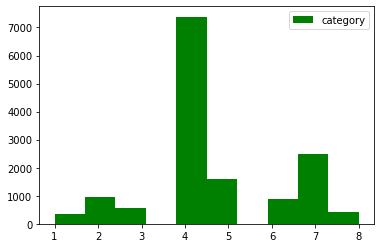

In [ ]:
plt.hist(dataset['category'], color = 'green', label = 'category')
plt.legend()
plt.show


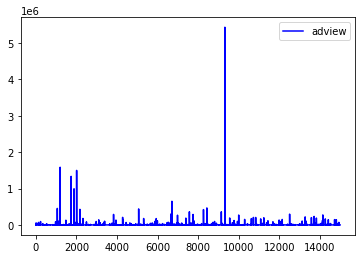

In [ ]:
plt.plot(dataset['adview'], color = 'blue', label = 'adview')
plt.legend()
plt.show()


As we can see in the above plot there exists an adview value going above 5 million 
therefore we will be removing all the adview values higher than 1.5 million as outliers

In [ ]:
dataset = dataset[dataset['adview'] < 1500000]

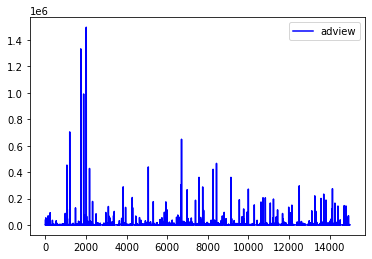

In [ ]:
plt.plot(dataset['adview'], color = 'blue', label = 'adview')
plt.legend()
plt.show()

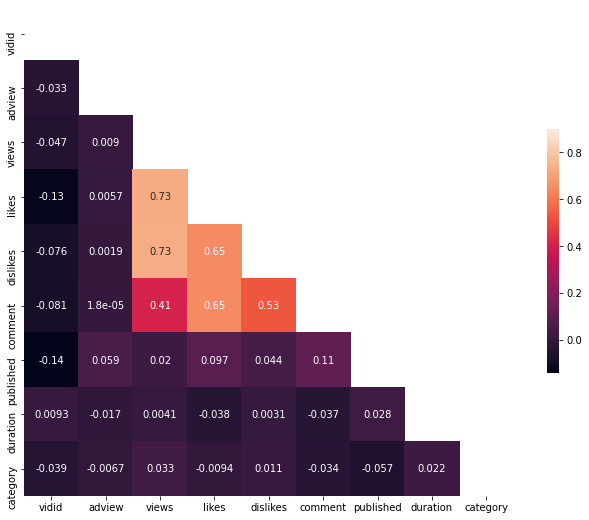

In [ ]:
from pandas.plotting import scatter_matrix
corrmat = dataset.corr()
plt.subplots(figsize=(12,9))
mask = np.zeros_like(corrmat,dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat,vmax = 0.9,square = True,annot = True, mask = mask, cbar_kws={'shrink': .5})


In [ ]:
# Allocating data


X = dataset.iloc[:, 2:].values
Y = dataset.iloc[:, 1].values

X,Y

(array([[1031602,    8523,     363, ...,    2168,     737,       6],
        [   1707,      56,       2, ...,    2185,     930,       4],
        [   2023,      25,       0, ...,    2094,     216,       3],
        ...,
        [   3479,      16,       1, ...,    1053,     313,       2],
        [    963,       0,       0, ...,     222,      26,       7],
        [  15212,      22,       5, ...,    1960,      11,       4]]),
 array([40,  2,  1, ...,  4,  1,  1]))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.1, random_state = 0)

x_train.shape, y_train.shape

((13171, 7), (13171,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
#Linear Regression

LR = linear_model.LinearRegression()
model1 = LR.fit(x_train, y_train)

y_pred_LR = model1.predict(x_test)


print(metrics.mean_absolute_error(y_test,y_pred_LR))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR)))
print(metrics.mean_squared_error(y_test,y_pred_LR))

3597.373301578461
23485.625479632225
551574604.1695503


In [ ]:
# Decision Tree Regressor

DTR = DecisionTreeRegressor()
model2 = DTR.fit(x_train, y_train)

y_pred_DTR = model2.predict(x_test)


print(metrics.mean_absolute_error(y_test,y_pred_DTR))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_DTR)))
print(metrics.mean_squared_error(y_test,y_pred_DTR))

8728.984289617487
69674.87836333866
4854588674.946038


In [ ]:
# Random Forest Regression

n_estimators = 200
md = 30
min_samples_split = 35
min_samples_leaf = 10

RFR = RandomForestRegressor(n_estimators = n_estimators, max_depth = md, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)
model3 = RFR.fit(x_train,y_train)

y_pred_RFR = model3.predict(x_test)


print(metrics.mean_absolute_error(y_test,y_pred_RFR))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_RFR)))
print(metrics.mean_squared_error(y_test,y_pred_RFR))

4427.001470834657
24084.427764493917
580059660.7431256


In [ ]:
# Support Vector Regression

svr = SVR()
model4 = svr.fit(x_train, y_train)

y_pred_svr = model4.predict(x_test)


print(metrics.mean_absolute_error(y_test,y_pred_svr))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr)))
print(metrics.mean_squared_error(y_test,y_pred_svr))

1755.9664630116679
23642.07402851456
558947664.3697627


In [ ]:
ann = keras.models.Sequential([
                              Dense(10, activation='relu', input_shape =  x_train.shape[1:]),
                              Dense(10, activation='relu'),
                              Dense(1) ])
Op = keras.optimizers.Adam()
L = keras.losses.mean_squared_error
ann.compile(optimizer = Op, loss = L, metrics = ['mean_squared_error'])

history = ann.fit(x_train,y_train, epochs = 100)

Epoch 1/100
412/412 [==============================] - 0s 977us/step - loss: 614906176.0000 - mean_squared_error: 614906176.0000
Epoch 2/100
412/412 [==============================] - 0s 971us/step - loss: 614880000.0000 - mean_squared_error: 614880000.0000
Epoch 3/100
412/412 [==============================] - 0s 1ms/step - loss: 614806976.0000 - mean_squared_error: 614806976.0000
Epoch 4/100
412/412 [==============================] - 0s 954us/step - loss: 614683072.0000 - mean_squared_error: 614683072.0000
Epoch 5/100
412/412 [==============================] - 0s 943us/step - loss: 614510400.0000 - mean_squared_error: 614510400.0000
Epoch 6/100
412/412 [==============================] - 0s 982us/step - loss: 614307520.0000 - mean_squared_error: 614307520.0000
Epoch 7/100
412/412 [==============================] - 0s 940us/step - loss: 614067712.0000 - mean_squared_error: 614067712.0000
Epoch 8/100
412/412 [==============================] - 0s 949us/step - loss: 613817024.0000 - mean_

In [ ]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred_ann = ann.predict(x_test)

print(metrics.mean_absolute_error(y_test,y_pred_ann))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_ann)))
print(metrics.mean_squared_error(y_test,y_pred_ann))

3012.3756731984718
23527.00097682896
553519774.9637108


In [ ]:
df = pd.DataFrame({'Actual': y_test,'Predicted': y_pred_svr})
df

,Actual,Predicted
0,8,1.840823
1,2,1.996277
2,1,1.811053
3,2,1.732945
4,1,1.688266
...,...,...
1459,1,1.447895
1460,13,3.488701
1461,6,2.285082
1462,18,1.655989


In [ ]:
#Saving the dataframe

import joblib

joblib.dump(svr, "supportvector_youtubeadviewprediction.pkl")

['supportvector_youtubeadviewprediction.pkl']

In [ ]:
df.to_csv('Predictions.csv')

